# Project Report

In [1]:
# Run to load packages
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Introduction:

Tennis is a popular sport among men and women all over the world. Therefore, the analysis of factors affecting performance and success is of great interest. Since tennis players' earnings can vary widely and "Prize Money” could reflect a player's earnings in tennis tournaments, understanding the determinants of prize money can provide insights into the financial success of professional tennis players. One main factor is ranking points. In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition. In our model, our research question is "How can we use ranking points to predict the prize money a tennis player receives?" To answer the question, we will be using the data `player_stats(1).csv` from Ultimate Tennis Statistics. This data set contains the statistics of the top 500 tennis players in the world.



****Working on more*****

Cited Source: https://olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics

# Data Description:

We use data from Ultimate Tennis Statistics, which is based on the open-source tennis data repository by Jeff Sackmann with some corrections and additions for incorrect or missing data. This database provides users with a variety of tennis statistics for men's tennis during the Open period, such as historical results, in-match statistics, records or all-time greats comparisons. The extensive nature of the dataset makes it a valuable resource for conducting in-depth analyses and deriving insights into various facets of men's tennis during the specified Open period.

The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest. We have wrangled and cleaned the dataset so that we can focus only on the variables we want to explore (age, backhand use, best rank, current rank, dominant hand, and prize money). We have also removed all the "NA" values. The wrangled dataset contains 407 rows and 9 columns. 

Our dependent variable is a player's earnings in tennis tournaments which is represented by `prize_money` in our model (Unit: US dollar). Since prize money is a visual reflection of tennis players' income in the game, we set prize money as the independent variable. We predict the prize money income of professional tennis players in the subsequent data analysis to understand their economic success.

Our main independent variable are `best_rank` and `current_rank`; `best_rank` represents a player's the highest rank they have achieved. It is crucial to consider this variable as it can impact a player's reputation, endorsements, and invitations to play in future prestige tournaments. The `best_rank` variable also provides insight into a player's playing history, which shows the challenges they faces or if they are on an upward trajectory. `current_rank` represents a tennis player's current rank. By analyzing the current ranks of players, it allows us to analyze how their ranking point may affect their progress; having a higher current rank will allow tennis players an opportunity to enter more honored tournaments, which will impact the amount of prize money they will earn. The independent variables are both crucial to analyze our problem because of a player has a higher rank, the amount of prize money they will receive may vary. 

Our control variables are `age`, `dominant_dummy` (their playing hand), and `backhand_dummy` (the use of backhand plays). These variables were chosen as they may all lead to changes of our dependent variable,`prize_money`.
`age` is important since younger players may have more energy and stamina, potentially providing them with a competitive advantage. On the other hand, older players may have the experience and strategic depth, but their physical condition may decline. As for `dominant_dummy` and `backhand_dummy`, these variables represent if they play plays with their left or right hand. Dominant hand and the choice of backhand style can impact a player's style and game strategy, which might be reflected in their prize earnings. We transformed the qualitative variables to its respective dummy variables, 1 is for right handed while 0 is for left handed. All of these variables provide different dimensions of a player's career and can help create a more accurate model.

We have conducted a summary statistics table. For the "Variable" column, it lists the names or labels of the variables or features in our dataset. 
For the "Mean" column, it displays the average value of each variable. The mean is a measure of central tendency, representing the central or typical value in our dataset.
For the "Max" column, it shows the maximum value observed for each variable. This value represents the highest point or measurement in the dataset for a particular variable. It helps identify the upper limit or extreme values within the dataset.
For the "Min" column, it shows the minimum value observed for each variable. This value represents the lowest point or measurement in the dataset for a particular variable. It helps identify the lowest limit or extreme values within the dataset.


`age` - Player's age

`backhand_dummy` - Player's backhand style	(where 1 means "One-handed" and 0 means "Two-handed")

`best_rank` - Player's highest rank

`current_rank` - Player's current standing

`dominant_dummy` - Player's dominant hand (1 means "Right-handed" and 0 means "Left-handed)

`prize_money` - Player's prize money

Cited Source: https://www.ultimatetennisstatistics.com/about

In [2]:
# run to load data set
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")
num_rows <- nrow(player_data)
num_rows
num_cols <- ncol(player_data)
num_cols

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 500

[1] 38

In [3]:
player_data

#The original dataset contains 500 rows and 38 columns with 500 tennis players and 37 factors of interest.

...1 Age             Country                   Plays        Wikipedia
1    0   26 (25-04-1993) Brazil                    Right-handed Wikipedia
2    1   18 (22-12-2001) United Kingdom            Left-handed  Wikipedia
3    2   32 (03-11-1987) Slovakia                  Right-handed Wikipedia
4    3   21 (29-05-1998) Korea, Republic of        Right-handed Wikipedia
5    4   27 (21-10-1992) Australia                 Right-handed Wikipedia
6    5   22 (11-02-1997) Poland                    Right-handed Wikipedia
7    6   28 (18-11-1991) United States             Right-handed Wikipedia
8    7   21 (12-05-1998) Taiwan, Province of China Right-handed Wikipedia
9    8   25 (29-07-1994) Uzbekistan                Right-handed Wikipedia
10   9   20 (02-04-1999) Finland                   Right-handed Wikipedia
11  10   19 (08-08-2000) Canada                    Right-handed Wikipedia
12  11   23 (11-02-1996) Russian Federation        Right-handed Wikipedia
13  12   28 (28-11-1991) Ecuador                   Right-handed Wikipedia
14  13   23 (22-02-1996) Germany                   Left-handed  Wikipedia
15  14   28 (17-03-1991) Canada                    Right-handed Wikipedia
16  15   31 (23-09-1988) Argentina                 Right-handed Wikipedia
17  16   24 (26-04-1995) Spain                     NA           Wikipedia
18  17   22 (02-05-1997) Australia                 Right-handed Wikipedia
19  18   20 (31-08-1999) Serbia                    Right-handed Wikipedia
20  19   22 (28-10-1997) United States             Right-handed Wikipedia
21  20   33 (12-04-1986) Spain                     Right-handed Wikipedia
22  21   32 (07-10-1987) United States             Right-handed Wikipedia
23  22   30 (20-09-1989) Slovakia                  Right-handed Wikipedia
24  23   30 (30-08-1989) Italy                     Right-handed Wikipedia
25  24   30 (29-11-1989) Sweden                    Right-handed Wikipedia
26  25   22 (23-03-1997) Italy                     Right-handed Wikipedia
27  26   26 (14-09-1993) Spain                     Right-handed Wikipedia
28  27   30 (12-11-1989) India                     Left-handed  Wikipedia
29  28   21 (19-02-1998) Brazil                    Right-handed Wikipedia
30  29   32 (24-05-1987) Italy                     Right-handed Wikipedia
⋮   ⋮    ⋮               ⋮                         ⋮            ⋮        
471 470  23 (12-01-1997) Spain                     Right-handed Wikipedia
472 471  24 (07-02-1995) United States             NA           Wikipedia
473 472  28 (13-11-1991) Germany                   Right-handed Wikipedia
474 473  34 (17-06-1985) Cyprus                    Right-handed Wikipedia
475 474  26 (29-06-1993) Brazil                    Right-handed Wikipedia
476 475  21 (27-11-1998) Italy                     NA           Wikipedia
477 476  25 (21-09-1994) France                    NA           Wikipedia
478 477  24 (05-05-1995) Italy                     Right-handed Wikipedia
479 478  25 (24-08-1994) France                    Right-handed Wikipedia
480 479  18 (03-08-2001) United States             Right-handed Wikipedia
481 480  27 (27-10-1992) Russian Federation        Right-handed Wikipedia
482 481  23 (03-10-1996) China                     Right-handed Wikipedia
483 482  29 (16-10-1990) United States             Right-handed Wikipedia
484 483  26 (17-01-1994) Belgium                   Right-handed Wikipedia
485 484  22 (20-01-1998) United States             Right-handed Wikipedia
486 485  32 (14-01-1988) Belgium                   Left-handed  Wikipedia
487 486  23 (03-05-1996) Japan                     Left-handed  Wikipedia
488 487  24 (27-09-1995) Japan                     Left-handed  Wikipedia
489 488  24 (04-07-1995) Canada                    Right-handed Wikipedia
490 489  18 (08-08-2001) Taiwan, Province of China Right-handed Wikipedia
491 490  28 (12-07-1991) Bosnia and Herzegovina    Right-handed Wikipedia
492 491  26 (28-07-1993) Bulgaria                  Right-handed Wikipedia
493 492 

Run the next cell tidy up the data.

In [4]:
set.seed(1000)
# Run to view tidied/wrangled data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")

player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    separate("Prize Money", into = c("prize_money", "dash"), sep = "-")|>
    rename(plays = Plays, backhand = Backhand, name = Name)|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money) |>
    drop_na()

player_data_renamed$dominant_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"

player_data_renamed <- player_data_renamed |>
                       mutate(age = as.numeric(age),
                              current_rank = as.numeric(current_rank),
                              best_rank = as.numeric(best_rank),
                              prize_money = as.numeric(prize_money),
                              plays = as.numeric(plays),
                              backhand = as.numeric(backhand))

player_data_renamed

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `plays = as.numeric(plays)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


name                        age plays current_rank best_rank backhand
1   Jack Draper                 18  NA    326          316       NA      
2   Lukas Lacko                 32  NA    178           44       NA      
3   Duck Hee Lee                21  NA    236          130       NA      
4   Bernard Tomic               27  NA    183           17       NA      
5   Hubert Hurkacz              22  NA     31           31       NA      
6   Sekou Bangoura              28  NA    307          213       NA      
7   Tung Lin Wu                 21  NA    232          229       NA      
8   Sanjar Fayziev              25  NA    417          253       NA      
9   Emil Ruusuvuori             20  NA    104          104       NA      
10  Felix Auger Aliassime       19  NA     22           17       NA      
11  Daniil Medvedev             23  NA      4            4       NA      
12  Emilio Gomez                28  NA    148          143       NA      
13  Johannes Haerteis           23  NA    431          319       NA      
14  Juan Martin Del Potro       31  NA    121            3       NA      
15  Marc Polmans                22  NA    133          132       NA      
16  Miomir Kecmanovic           20  NA     54           47       NA      
17  Taylor Harry Fritz          22  NA     34           25       NA      
18  Marcel Granollers           33  NA    130           19       NA      
19  Sam Querrey                 32  NA     45           11       NA      
20  Andrej Martin               30  NA    105           98       NA      
21  Roberto Marcora             30  NA    172          171       NA      
22  Markus Eriksson             30  NA    293          277       NA      
23  Andrea Pellegrino           22  NA    339          312       NA      
24  Andres Artunedo Martinavarr 26  NA    448          293       NA      
25  Prajnesh Gunneswaran        30  NA    123           75       NA      
26  Fabio Fognini               32  NA     12            9       NA      
27  Manuel Guinard              24  NA    297          291       NA      
28  Francisco Cerundolo         21  NA    228          228       NA      
29  Danilo Petrovic             28  NA    166          166       NA      
30  Jurij Rodionov              20  NA    331          187       NA      
⋮   ⋮                           ⋮   ⋮     ⋮            ⋮         ⋮       
378 Marcos Giron                26  NA    107          102       NA      
379 Thomas Fabbiano             30  NA    114           70       NA      
380 Max Purcell                 21  NA    216          208       NA      
381 Alejandro Tabilo            22  NA    208          206       NA      
382 Ricardo Ojeda Lara          27  NA    490          171       NA      
383 Milos Raonic                29  NA     35            3       NA      
384 Laslo Djere                 24  NA     40           27       NA      
385 Johan Sebastien Tatlot      23  NA    500          226       NA      
386 Bernabe Zapata Miralles     23  NA    210          196       NA      
387 Yannick Hanfmann            28  NA    167           99       NA      
388 Marcos Baghdatis            34  NA    179            8       NA      
389 Pedro Sakamoto              26  NA    298          292       NA      
390 Andrea Vavassori            24  NA    289          289       NA      
391 Brandon Nakashima           18  NA    360          355       NA      
392 Alexey Vatutin              27  NA    207          136       NA      
393 Fajing Sun                  23  NA    365          365       NA      
394 Daniel Nguyen               29  NA    351          189       NA      
395 Frances Tiafoe              22  NA     50           29       NA      
396 Ruben Bemelmans             32  NA    260           84       NA      
397 Yoshihito Nishioka          24  NA     71           58       NA      
398 Brayden Schnur              24  NA    103           92       NA      
399 Chun Hsin Tseng             18  NA    299          299       NA      
400 Mirz

Run the cell below to select the columnms we are interested in using for our analysis into `player_data_selected`.

In [5]:
player_data_selected<-as_tibble(player_data_renamed)|>
                    select(age, current_rank, best_rank, prize_money, dominant_dummy, backhand_dummy, plays, backhand) 
head(player_data_selected)

age current_rank best_rank prize_money dominant_dummy backhand_dummy plays
1 18  326          316         59040     0              0              NA   
2 32  178           44       3261567     1              0              NA   
3 21  236          130        374093     1              0              NA   
4 27  183           17       6091971     1              0              NA   
5 22   31           31       1517157     1              0              NA   
6 28  307          213        278709     1              0              NA   
  backhand
1 NA      
2 NA      
3 NA      
4 NA      
5 NA      
6 NA

Before we perform our exploratory data analysis, we are going to create our training and testing data sets. Our training data will be called `player_train` and our testing data will be called `player_test`.

In [6]:
# Run to split data into training and testing set
player_split <- initial_split(player_data_selected, prop = 0.75, strata = prize_money)
player_train <- training(player_split) |>
   select (-plays)|>
    select(-backhand)

player_test <- testing(player_split)|>
  select (-plays)|>
    select(-backhand)

Next, we are summarizing the player data into its mean values (`player_summarize_mean`), maximum values (`player_summarize_max`), and minimum values (`player_summarize_min`). After performing the summarization of our player data, we are merging the data together by Variables (i.e. backhand, age, rank, etc.) into `player_summarize_data`.

In [7]:
# Run to calculate mean, max and min of each variable
player_summarize_mean <- player_train |>
                         
                        map_dfr(mean, na.rm = TRUE) |>
                        round(1) |>
                         pivot_longer(
                          cols = age:backhand_dummy,
                          names_to = "Variable",
                          values_to = "Mean")

                        
player_summarize_max <- player_train |>
                        
                        map_dfr(max, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_min <- player_train |>
                       
                        map_dfr(min, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Min") 

player_summarize_data_v1 = merge(player_summarize_mean, player_summarize_max, by = "Variable")
player_summarize_data_v2 = merge(player_summarize_data_v1,player_summarize_min, by = "Variable")


player_summarize_data_v2




Variable       Mean       Max        Min 
1 age                  26.4         40   17
2 backhand_dummy        0.1          1    0
3 best_rank           145.9        488    1
4 current_rank        223.6        500    1
5 dominant_dummy        0.9          1    0
6 prize_money    77568262.8 2746601610 2980

From the summarization of the variables, it allows us to analyze average, maximum, and minimum value of each variable. For `age`, the average age of tennis players is 26 years old, while the oldest player is 40 and the youngest player is 17. The average `best_rank` of players is 146th place, with the lowest rank being 488th place and the highest rank being 1st place. The `current_rank`of players is 224th place, with the lowest rank being 500th place and the highest rank being 1st place. With this analysis, we summarized that the average player prize money being $\$ $77568263, with the largest amount of money received being $\$ $2746601610 and the lowest amount of money received being $\$ $2980.

# Methods & Results:

We will use a regression model to predict the expected prize money for a tennis athlete by using multiple variables to answer our research question.


We use scatter plots and box plots to visualize the results, which depict the relationships between independent variables with prize money as the dependent variable. 
By examining scatter plots, we can gain valuable insights, such as if the points cluster in a specific pattern, it may suggest a correlation or relationship between independent variables and prize money. Additionally, the color-coded data points help us distinguish players with different dominant hands, potentially revealing variations in prize money earnings based on this characteristic. (*******more work*******)

By examining box plots, we...
Figure 4 shows that 
Figure 5

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
    - note: all tables and figure should have a figure/table number and a legend


We firstly use the `ggpairs()` function from the GGally package to explore the relationships between the different variables. 

In [8]:
install.packages("GGally")
library(GGally)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggplot2’, ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


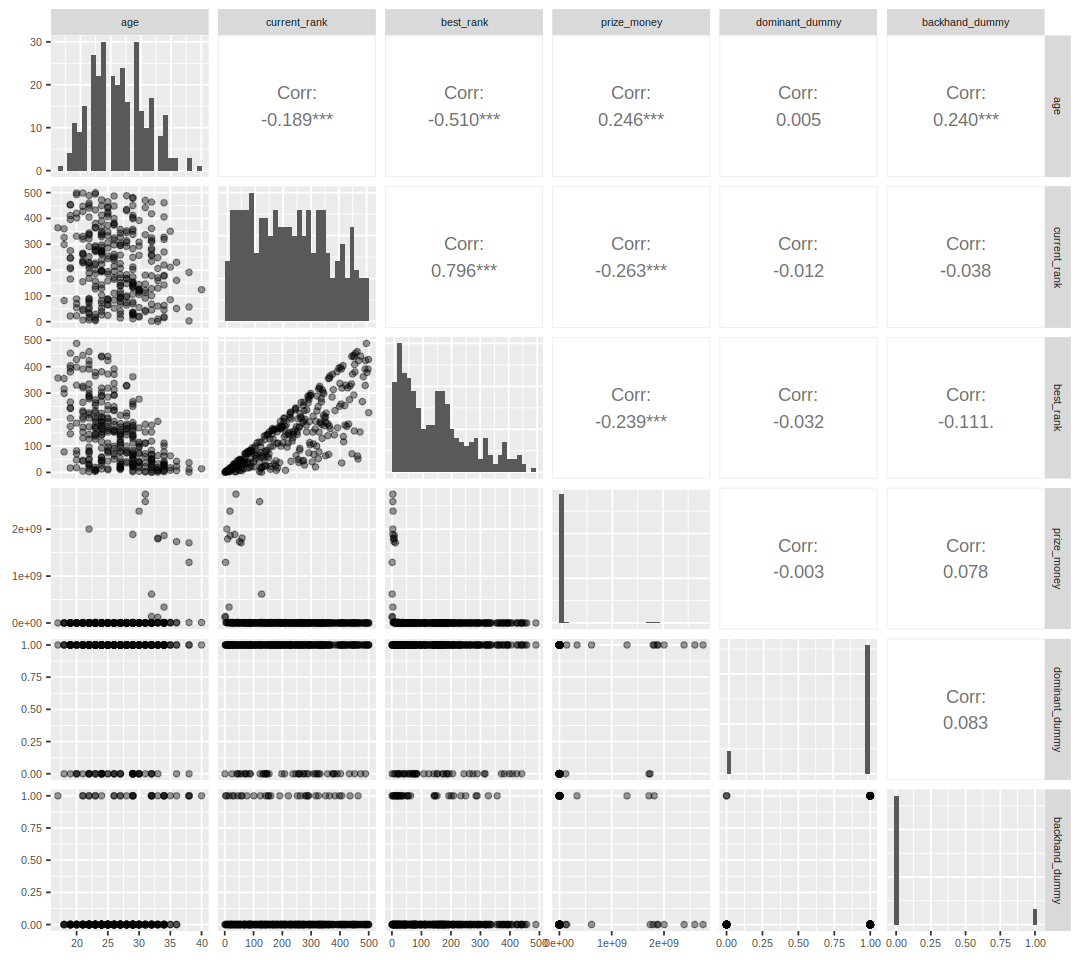

In [9]:
set.seed(1000) # DO NOT REMOVE

options(repr.plot.height = 8, repr.plot.width = 9)
 player_pairplot <- player_train |> 
                         
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 8))

player_pairplot
#Figure 0

From Figure 0, we could explore the relationship between the different variables. `age` has a positive correlation (0.246) with `prize_money`; `current_rank` has a negative correlation (-0.263) with `prize_money`; `best_rank` has a negative correlation (-0.239) with `prize_money`.

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


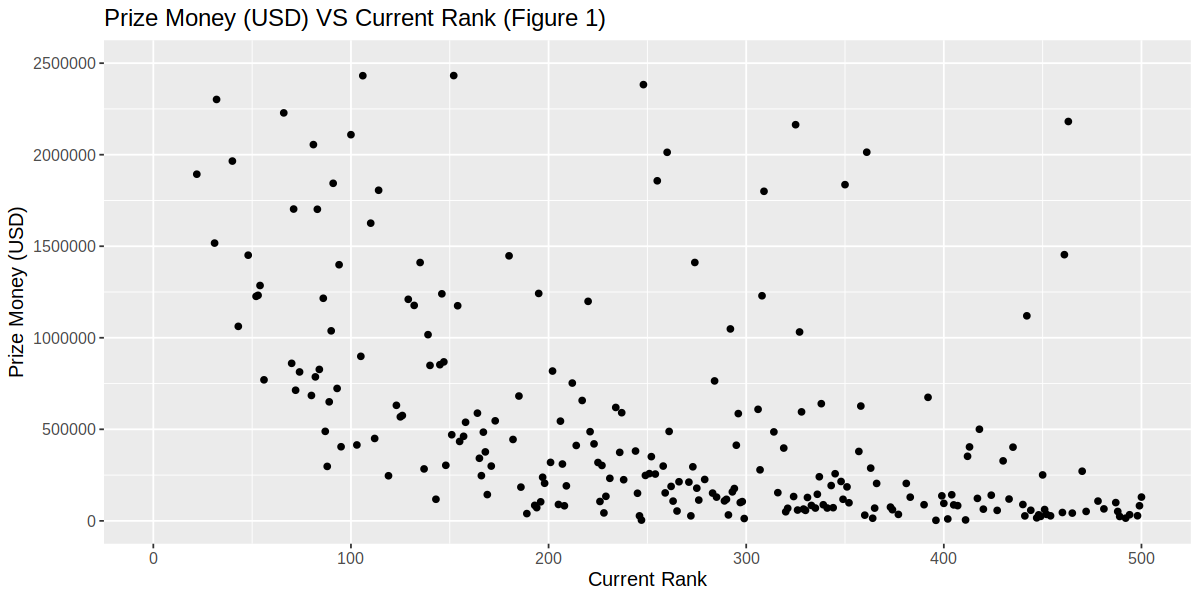

In [10]:
# Run to see plot comparing prize money and current rank

options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_current <- ggplot(player_train, aes(x = current_rank, y = prize_money)) +
  geom_point() +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Current Rank (Figure 1)")

small_plot_current

#Figure 1

Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


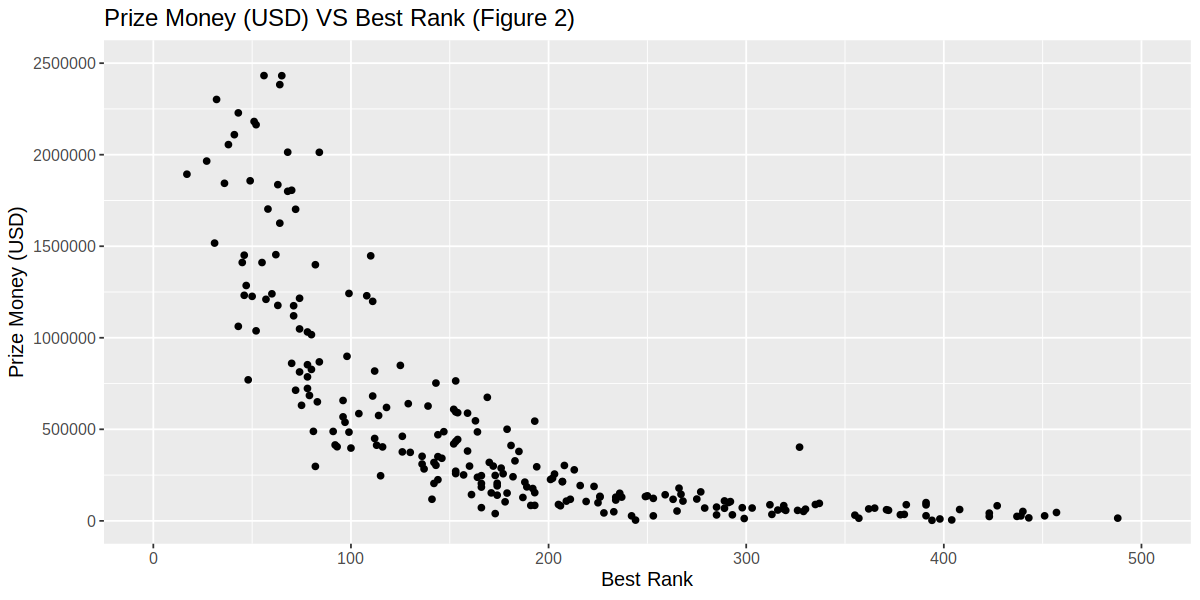

In [11]:
# Run to see plot comparing prize money and best rank 

options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_best <- ggplot(player_train, aes(x = best_rank, y = prize_money)) +
  geom_point() +
  xlab("Best Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Best Rank (Figure 2)")

small_plot_best


Warning message:
“Removed 73 rows containing missing values (`geom_point()`).”


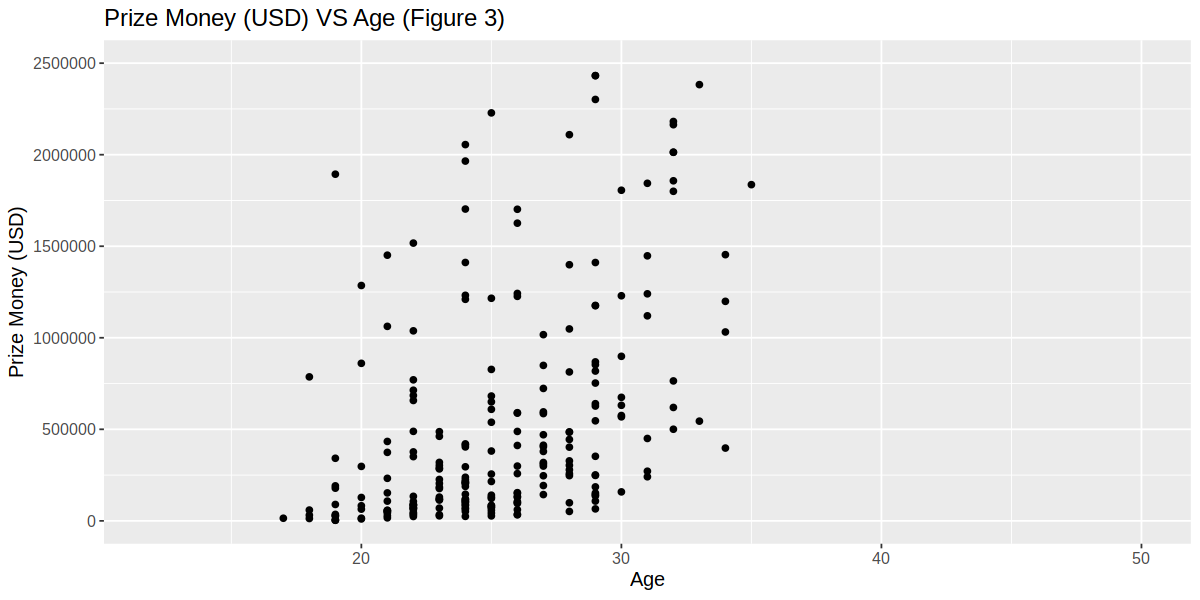

In [20]:
# Run to see plot comparing prize money and age

options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_age <- ggplot(player_train, aes(x = age, y = prize_money)) +
  geom_point() +
  xlab("Age") +
  xlim(12, 50) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Age (Figure 3)")


small_plot_age

In [28]:
dominat_dummy_1 <- player_train |>
 select(dominant_dummy, prize_money)|>
  filter (dominant_dummy==1)

dominat_dummy_1

dominat_dummy_0 <- player_train |>
 select(dominant_dummy,  prize_money)|>
  filter (dominant_dummy==0)
dominat_dummy_0

dominant_dummy prize_money
1   1              122734     
2   1               87942     
3   1               32892     
4   1              100014     
5   1               43346     
6   1               39679     
7   1               49635     
8   1               33471     
9   1               89281     
10  1               71874     
11  1               89517     
12  1              129344     
13  1               64463     
14  1               83171     
15  1               70103     
16  1               27473     
17  1               27104     
18  1               53699     
19  1              105848     
20  1               51479     
21  1               99816     
22  1               95564     
23  1               45711     
24  1               72127     
25  1               69960     
26  1               27950     
27  1               57210     
28  1               98772     
29  1               27409     
30  1               14811     
⋮   ⋮              ⋮          
229 1                10425605 
230 1               139144944 
231 1                 5355556 
232 1                 3566408 
233 1                 2382735 
234 1                 4416862 
235 1                 6492427 
236 1               615440074 
237 1                 7163918 
238 1                 4076115 
239 1              1292318912 
240 1                 9845365 
241 1                 3115878 
242 1                 8003533 
243 1               337902796 
244 1                 3678732 
245 1                 4209879 
246 1                 7630617 
247 1                13578010 
248 1              1793081633 
249 1              1812545726 
250 1                 8001478 
251 1              1866990624 
252 1                 5287905 
253 1                 2940388 
254 1                 2562473 
255 1                 8480383 
256 1              1887985524 
257 1                 8918917 
258 1                 3304117

dominant_dummy prize_money
1  0                   59040 
2  0                  127760 
3  0                   60865 
4  0                   88195 
5  0                   35293 
6  0                    4166 
7  0                   51486 
8  0                  119138 
9  0                   68775 
10 0                   10406 
11 0                   23875 
12 0                  117705 
13 0                   82413 
14 0                   61984 
15 0                  299221 
16 0                  204501 
17 0                  379150 
18 0                  295289 
19 0                  205414 
20 0                  631094 
21 0                 1062355 
22 0                  849099 
23 0                  860421 
24 0                 1215794 
25 0                  868315 
26 0                  764348 
27 0                 1411032 
28 0                 1229509 
29 0                 1174974 
30 0                 1176787 
31 0                  650117 
32 0                  852893 
33 0                  590815 
34 0                 1411268 
35 0                 2013015 
36 0                 1703096 
37 0               119601561 
38 0                 3611278 
39 0                 6903920 
40 0                 5334788 
41 0                 4628160 
42 0                 4810128 
43 0              1735381128 
44 0              1711451030 
45 0                 4292576

In [38]:
install.packages("cowplot")
library(cowplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 64 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 9 rows containing non-finite values (`stat_boxplot()`).”


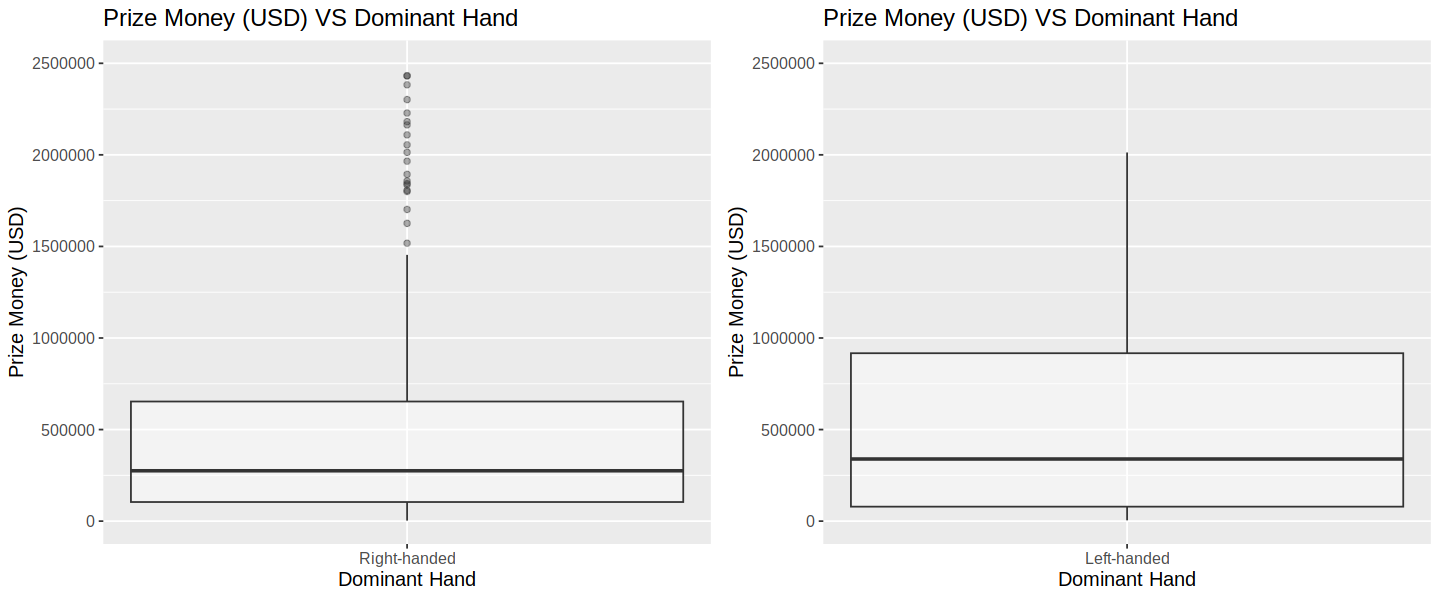

In [44]:
# Run to see plot comparing prize money and dominant hand

options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand_1 <- ggplot(dominat_dummy_1, aes(x = dominant_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand")


options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand_0 <- ggplot(dominat_dummy_0, aes(x = dominant_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand")


options(repr.plot.width = 12, repr.plot.height = 5) 
small_plot_hand <- plot_grid(
small_plot_hand_1,
  small_plot_hand_0,
     nrow = 1
 )

small_plot_hand
#Figure 4

The boxplot shows that left-handed players have very similar median (middle quartile) of prize money (about $260000 ~ $280000) compare with right-handed players. The distribution of the variance in prizes is larger for left-handed players than for right-handed players. The top 25% of left-handed player have relatively higher prize money, even though right-handed group tends to have more possibile outliers.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“Removed 73 rows containing non-finite values (`stat_boxplot()`).”


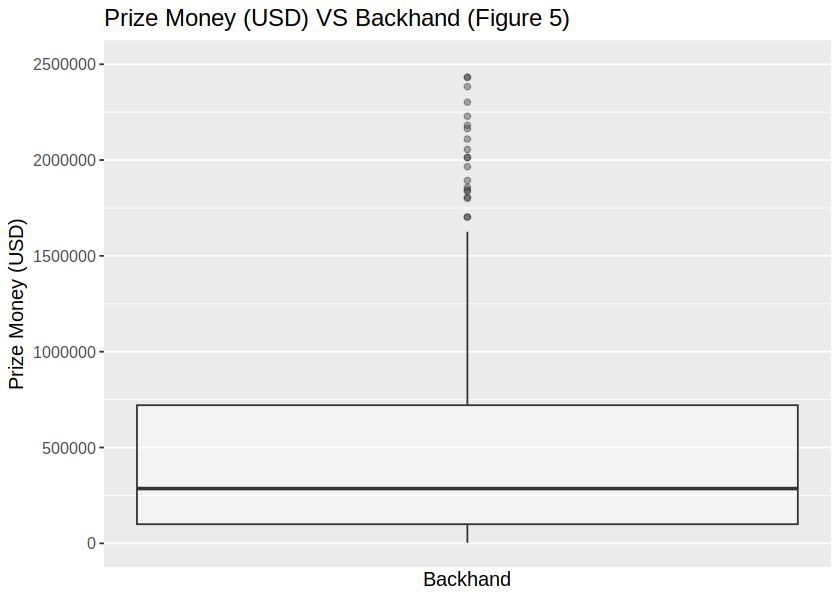

In [14]:
# Run to see plot comparing prize money and backhand use

options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_backhand <- ggplot(player_train, aes(x = backhand_dummy, y = prize_money)) +
  geom_boxplot(alpha=0.4) +
  xlab("Backhand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("One-handed", "Two-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Backhand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Backhand (Figure 5)")

small_plot_backhand

The boxplot shows that left-handed players have very similar median (middle quartile) of prize money (about $260000 ~ $280000) compare with right-handed players. The distribution of the variance in prizes is larger for left-handed players than for right-handed players. The top 25% of left-handed player have relatively higher prize money, even though right-handed group tends to have more possibile outliers.

In [15]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


In [16]:
lm_recipe <- recipe(prize_money ~ ., data = player_train) |>
  update_role(prize_money, new_role = "outcome")

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = player_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)             age    current_rank       best_rank  dominant_dummy  
    -386625120        22694827         -981545          591070        -4983739  
backhand_dummy  
      25793809  


Here, we make predictions on the test data set to assess the quality of our model:

In [17]:
player_preds <- lm_fit |>
   predict(player_train) |>
   bind_cols(player_train)


lm_test_results <- lm_fit |>
         predict(player_test) |>
         bind_cols(player_test) |>
         metrics(truth = prize_money, estimate = .pred)
lm_test_results
lm_rmspe <- lm_test_results |>
          filter(.metric == "rmse") |>
          select(.estimate) |>
        pull()
          
lm_rmspe

.metric .estimator .estimate   
1 rmse    standard   3.914241e+08
2 rsq     standard   1.369339e-01
3 mae     standard   1.950335e+08

[1] 391424143

We get slopes/intercept from linear regression. We extract those slope values from our model object as shown below:

In [18]:
mcoeffs <- lm_fit |>
             extract_fit_parsnip() |>
             tidy()

mcoeffs

term           estimate     std.error   statistic   p.value     
1 (Intercept)    -386625119.7 177422954.6 -2.17911555 0.0301087917
2 age              22694827.2   6010560.1  3.77582571 0.0001926023
3 current_rank      -981544.5    270298.2 -3.63133902 0.0003319976
4 best_rank          591070.2    358808.4  1.64731430 0.1005510186
5 dominant_dummy   -4983738.6  58552032.3 -0.08511641 0.9322261949
6 backhand_dummy   25793809.4  69719500.3  0.36996549 0.7116718765

And then use those slopes to write a mathematical equation to describe the prediction plane:

prize money = β0 + β1⋅(age) + β2⋅(current rank) + β3⋅(best rank) + β4⋅(dominant hand) + β5⋅(backhand)

β0 is the vertical intercept of the hyperplane (the prize money when all variables are 0)

β1 is the slope for the first predictor (the rate of change in prize money as players age, holding all other control variables constant)

β2 is the slope for the second predictor (the rate of change in prize money as a player's current ranking falls, holding all other control variables constant)

β3 is the slope for the third predictor (the rate of change in prize money as a player's best ranking falls, holding all other control variables constant)

β4 is the slope for the fourth predictor (the rate of change in prize money when a player uses his right hand, holding all other control variables constant)

β5 is the slope for the fifth predictor (the rate of change in prize money when a player hits the ball with a one-handed backhand, holding all other control variables constant)

Finally, we can fill in the values for β0, β1, β2, β3, β4, β5 from the model output above to create the equation of the plane of best fit to the data:

prize money = -309969781.3 + 17373778.7⋅(age) − 729819.2⋅(current rank) + 425267.6⋅(best rank) + 4740779.8⋅(dominant hand) + 104711771.3⋅(backhand)

## Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.